In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
monthly_temp_anamoly=pd.read_csv('Air_Temperature.csv', names=['Year','Month','Anamoly'])

In [5]:
monthly_temp_anamoly.head()

,Year,Month,Anamoly
0,1850,1,-0.779
1,1850,2,-0.260
2,1850,3,-0.401
3,1850,4,-0.699
4,1850,5,-0.687


In [6]:
#Monthly absolute temperatures
abs_temp=[12.28,12.50,13.12,14.04,15.02,15.73,16.00,15.83,15.24,14.30,13.29,12.55]
abs_temp

[12.28,
 12.5,
 13.12,
 14.04,
 15.02,
 15.73,
 16.0,
 15.83,
 15.24,
 14.3,
 13.29,
 12.55]

In [7]:
j=0
for i in monthly_temp_anamoly.index:
        monthly_temp_anamoly.at[i,'Temperature']=monthly_temp_anamoly.at[i,'Anamoly']+abs_temp[j]
        j=j+1
        if j==11:
            j=0                               

In [8]:
monthly_temp_anamoly['Date'] = pd.to_datetime(monthly_temp_anamoly[['Year', 'Month']].assign(Day=1))

In [9]:
monthly_temp_anamoly.head(12)

,Year,Month,Anamoly,Temperature,Date
0,1850,1,-0.779,11.501,1850-01-01
1,1850,2,-0.260,12.240,1850-02-01
2,1850,3,-0.401,12.719,1850-03-01
3,1850,4,-0.699,13.341,1850-04-01
4,1850,5,-0.687,14.333,1850-05-01
5,1850,6,-0.401,15.329,1850-06-01
6,1850,7,-0.258,15.742,1850-07-01
7,1850,8,-0.236,15.594,1850-08-01
8,1850,9,-0.501,14.739,1850-09-01
9,1850,10,-0.662,13.638,1850-10-01


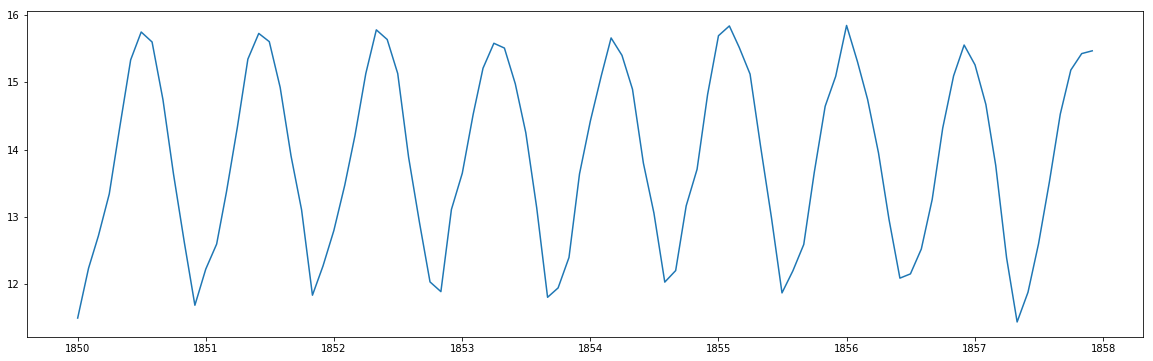

In [10]:
plt.figure(figsize=(20,6))
plt.plot(monthly_temp_anamoly['Date'].head(96),monthly_temp_anamoly['Temperature'].head(96));

In [11]:
avg_temp=monthly_temp_anamoly.groupby('Year',as_index=False).mean()

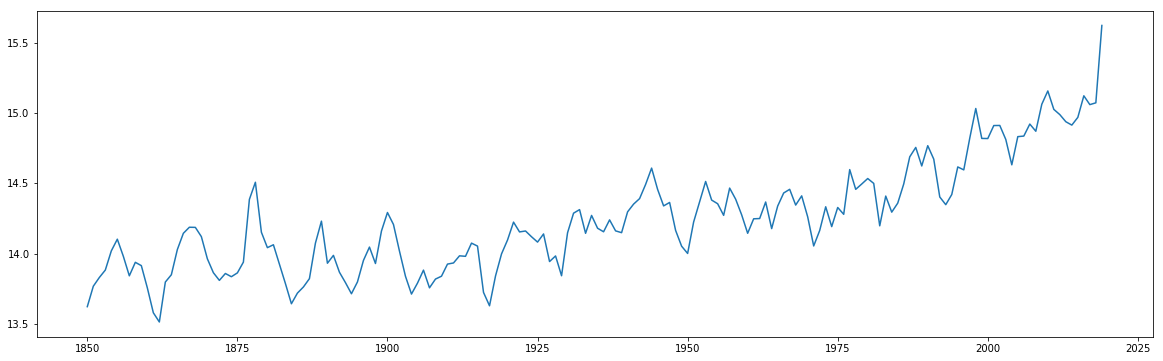

In [12]:
plt.figure(figsize=(20,6))
plt.plot(avg_temp['Year'],avg_temp['Temperature']);

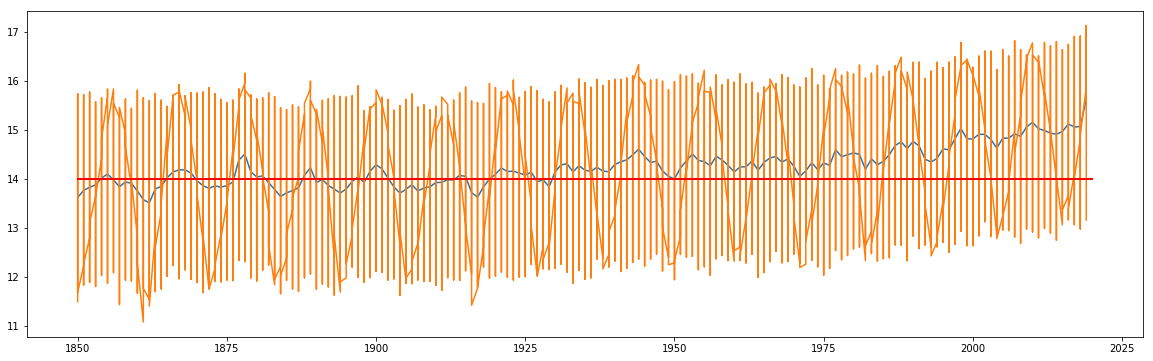

In [13]:
plt.figure(figsize=(20,6))
plt.plot(avg_temp['Year'],avg_temp['Temperature']);
plt.plot(monthly_temp_anamoly['Year'],monthly_temp_anamoly['Temperature']);
plt.plot([1850,2020], [14,14], 'Red', lw=2);

In [14]:
co2=pd.read_csv('co2.csv')

In [15]:
co2=co2.replace(-99.99,np.nan)
co2['Co2_interpolated']=co2['Co2 (ppm)'].interpolate(method='polynomial', order=2)
co2['Co2_interpolated']=round(co2['Co2_interpolated'],2)

In [16]:
co2.loc[co2['Co2 (ppm)'].isna()]

,Year,Month,Co2 (ppm),Co2 interpolated,Co2_interpolated
3,1958,6,NaN,317.10,317.24
7,1958,10,NaN,312.66,312.66
71,1964,2,NaN,320.07,320.66
72,1964,3,NaN,320.73,321.53
73,1964,4,NaN,321.77,322.09
213,1975,12,NaN,330.59,330.47
313,1984,4,NaN,346.84,346.81


In [17]:
co2['Date'] = pd.to_datetime(co2[['Year', 'Month']].assign(Day=1))

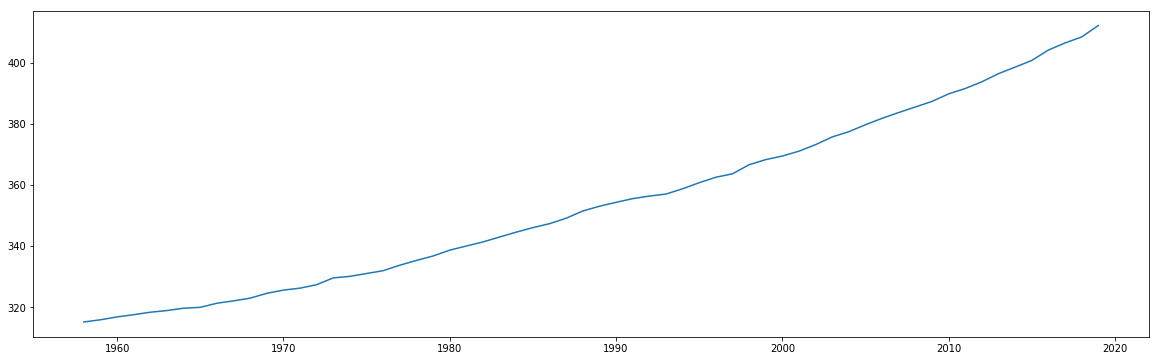

In [18]:
co2_temp=co2.groupby('Year',as_index=False).mean()
plt.figure(figsize=(20,6))
plt.plot(co2_temp['Year'],co2_temp['Co2_interpolated']);